## Table of Contents
* [Basic Types of SQL Statements](#section1)
* [Basic SQL](#section2)
  * [SELECT Statement](#section2_1)
  * [WHERE Clause](#section2_2)
  * [COUNT, DISTINCT, LIMIT ](#section2_3)
  * [INSERT Statement](#section2_4)
  * [UPDATE and DELETE Statements ](#section2_5)
  * [CREATE TABLE Statement ](#section2_6)
  * [ALTER Statement](#section2_7)
  * [TRUNCATE Statement](#section2_8)
  * [DROP Statement](#section2_9)

In [ ]:
# These libraries are pre-installed in SN Labs. If running in another environment please uncomment lines below to install them:
!pip install --force-reinstall ibm_db==3.1.0 ibm_db_sa==0.3.3
# Ensure we don't load_ext with sqlalchemy>=1.4 (incompadible)
!pip uninstall sqlalchemy==1.4 -y && pip install sqlalchemy==1.3.24
!pip install ipython-sql

In [23]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [24]:
# The code was removed by Watson Studio for sharing.

In [25]:
%sql Select * from CENSUS_DATA limit 5;

 * ibm_db_sa://gfq03432:***@125f9f61-9715-46f9-9399-c8177b21803b.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:30426/bludb
Done.


community_area_number,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16__unemployed,percent_aged_25__without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income,hardship_index
1,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39
2,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46
3,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20
4,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17
5,North Center,0.3,7.5,5.2,4.5,26.2,57123,6


# SQL Notes

## Basic Types of SQL Statements <a name = "section1"></a>
<b>DDL  (Data Definition Language): </b> Used to define, change or drop data<br><br>
Common DDL:<br>
- CREATE
- ALTER
- TRUNCATE
- DROP
<br>

<b>DML  (Data Manupulation Language): </b> Used to read and modify data. These operations are often refered to as <b>CRUD</b> operations (Create, Read, Update & Delete rows)<br>
Common DML:<br>
- INSERT
- SELECT
- UPDATE
- DELETE

## Basic SQL <a name = "section2"></a>

### SELECT Statement<a name = "section2_1"></a>
The SELECT statement is called a query, and the output we get from executing this query is called a result set or a result table<br>
```SELECT``` Syntax:
```SQL
SELECT <column 1>, <column 2> FROM <source>
```
Note: The order of the columns displayed will always match the order of the SELECT statement. <br>
The following examples will be using this database as an example. Please note that the table bellow does not show the full data.


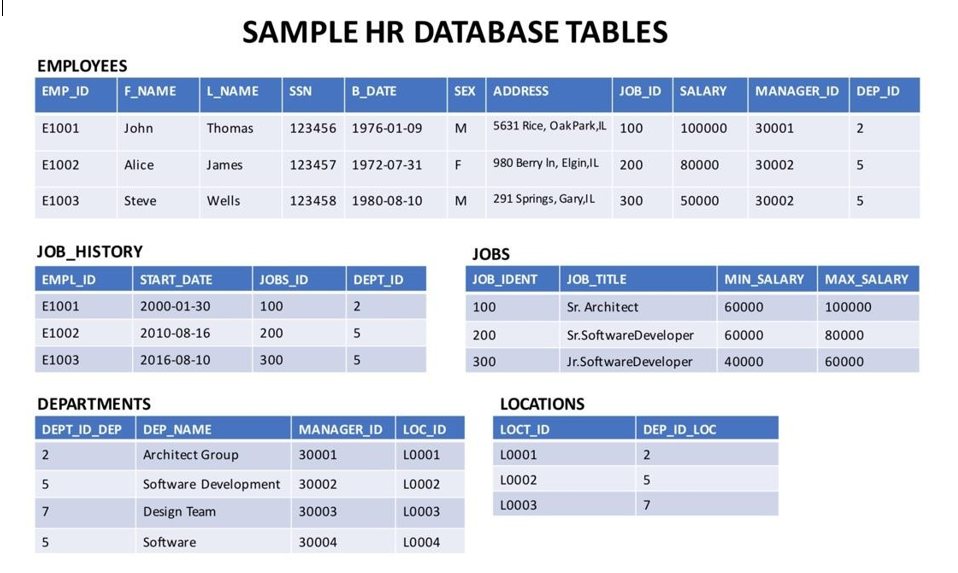

<b>SELECT Statement Example</b><br>
The ```*``` is used for selecting all. In this case we use ```*``` to retrieve all columns. The ```FROM``` indicates which table to look at.

In [29]:
%%sql
SELECT * from EMPLOYEES

 * ibm_db_sa://gfq03432:***@125f9f61-9715-46f9-9399-c8177b21803b.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:30426/bludb
Done.


emp_id,f_name,l_name,ssn,b_date,sex,address,job_id,salary,manager_id,dep_id
E1001,John,Thomas,123456,1976-01-09,M,"5631 Rice, OakPark,IL",100,100000.00,30001,2
E1002,Alice,James,123457,1972-07-31,F,"980 Berry ln, Elgin,IL",200,80000.00,30002,5
E1003,Steve,Wells,123458,1980-08-10,M,"291 Springs, Gary,IL",300,50000.00,30002,5
E1004,Santosh,Kumar,123459,1985-07-20,M,"511 Aurora Av, Aurora,IL",400,60000.00,30004,5
E1005,Ahmed,Hussain,123410,1981-01-04,M,"216 Oak Tree, Geneva,IL",500,70000.00,30001,2
E1006,Nancy,Allen,123411,1978-02-06,F,"111 Green Pl, Elgin,IL",600,90000.00,30001,2
E1007,Mary,Thomas,123412,1975-05-05,F,"100 Rose Pl, Gary,IL",650,65000.00,30003,7
E1008,Bharath,Gupta,123413,1985-05-06,M,"145 Berry Ln, Naperville,IL",660,65000.00,30003,7
E1009,Andrea,Jones,123414,1990-07-09,F,"120 Fall Creek, Gary,IL",234,70000.00,30003,7
E1010,Ann,Jacob,123415,1982-03-30,F,"111 Britany Springs,Elgin,IL",220,70000.00,30004,5


If we just want to select First and last names from employees we can use the following statement. The columns in the select statement must be seperated with a comma. If we wish to view the selected column with a seperate name we can use the ```as``` clause. In the example bellow, ```as``` was used to rename ```l_name``` as ```Last Name```

In [30]:
%%sql
SELECT f_name, l_name as "Last Name" from EMPLOYEES;

 * ibm_db_sa://gfq03432:***@125f9f61-9715-46f9-9399-c8177b21803b.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:30426/bludb
Done.


f_name,Last Name
John,Thomas
Alice,James
Steve,Wells
Santosh,Kumar
Ahmed,Hussain
Nancy,Allen
Mary,Thomas
Bharath,Gupta
Andrea,Jones
Ann,Jacob


### WHERE Clause <a name = "section2_2"></a>
```WHERE``` Syntax:
```SQL
SELECT <column> FROM <table1> WHERE predicate
```
The predicate must evaluate to TRUE, FALSE, or UNKNOWN. The predicate can be used to restrict the results. In the example bellow we use the where clause to find employees with a salary less than 70000.

In [31]:
%%sql
SELECT f_name, l_name as "Last Name",salary from EMPLOYEES WHERE SALARY < 70000;

 * ibm_db_sa://gfq03432:***@125f9f61-9715-46f9-9399-c8177b21803b.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:30426/bludb
Done.


f_name,Last Name,salary
Steve,Wells,50000.00
Santosh,Kumar,60000.00
Mary,Thomas,65000.00
Bharath,Gupta,65000.00


### COUNT, DISTINCT, LIMIT <a name = "section2_3"></a>

<b>COUNT()</b>: A built-in function that retrieves the number of rows matching the query criteria<br>
<b>DISTINCT</b>: Used to list the distict values for a query<br>
<b>LIMIT</b>: Used to limit the rows outputed by the query

The following is an example of using COUNT on the EMPLOYEES table from the HR Dataset that we have been using. This query returns the number of rows in the EMPLOYEES table. Note that the query does not have a header so it returns the column number.

In [34]:
%%sql
SELECT COUNT(*) from EMPLOYEES;

 * ibm_db_sa://gfq03432:***@125f9f61-9715-46f9-9399-c8177b21803b.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:30426/bludb
Done.


1
10


The following is an example of using DISTINCT on the EMPLOYEES table from the HR Dataset that we have been using. This query returns the unique manager IDs in the EMPLOYEES table.

In [38]:
%%sql
SELECT DISTINCT MANAGER_ID from EMPLOYEES;

 * ibm_db_sa://gfq03432:***@125f9f61-9715-46f9-9399-c8177b21803b.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:30426/bludb
Done.


manager_id
30001
30002
30003
30004


The following is an example of using LIMIT on the EMPLOYEES table from the HR Dataset that we have been using. This query returns the first 3 rows in the EMPLOYEES table.

In [39]:
%%sql
SELECT * from EMPLOYEES LIMIT 3;

 * ibm_db_sa://gfq03432:***@125f9f61-9715-46f9-9399-c8177b21803b.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:30426/bludb
Done.


emp_id,f_name,l_name,ssn,b_date,sex,address,job_id,salary,manager_id,dep_id
E1001,John,Thomas,123456,1976-01-09,M,"5631 Rice, OakPark,IL",100,100000.00,30001,2
E1002,Alice,James,123457,1972-07-31,F,"980 Berry ln, Elgin,IL",200,80000.00,30002,5
E1003,Steve,Wells,123458,1980-08-10,M,"291 Springs, Gary,IL",300,50000.00,30002,5


### INSERT Statement <a name = "section2_4"></a>
<b>INSERT</b>: The insert statement is used to insert data into a prexisting table and append to it. The insert statement is a DML (Data Manipulation Language) statement used to read and modify data.<br>
```INSERT``` Syntax:
```sql
INSERT INTO [TableName] <([ColumnName],...)>
VALUES ([Value],...)
```

Bellow shows an example of how an INSERT statement could be used. In this case we are adding 'E2001','Frank','Harris','2001264','1975-03-02','M','3001' into the the columns "emp_id,f_name,l_name,ssn,b_date,sex,DEP_ID respectivly".

In [42]:
%%sql
INSERT INTO EMPLOYEES (emp_id,f_name,l_name,ssn,b_date,sex,DEP_ID) 
VALUES ('E2001','Frank','Harris','2001264','1975-03-02','M','3001');

 * ibm_db_sa://gfq03432:***@125f9f61-9715-46f9-9399-c8177b21803b.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:30426/bludb
1 rows affected.


[]

In [43]:
%%sql
SELECT * from EMPLOYEES;

 * ibm_db_sa://gfq03432:***@125f9f61-9715-46f9-9399-c8177b21803b.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:30426/bludb
Done.


emp_id,f_name,l_name,ssn,b_date,sex,address,job_id,salary,manager_id,dep_id
E1001,John,Thomas,123456,1976-01-09,M,"5631 Rice, OakPark,IL",100,100000.00,30001,2
E1002,Alice,James,123457,1972-07-31,F,"980 Berry ln, Elgin,IL",200,80000.00,30002,5
E1003,Steve,Wells,123458,1980-08-10,M,"291 Springs, Gary,IL",300,50000.00,30002,5
E1004,Santosh,Kumar,123459,1985-07-20,M,"511 Aurora Av, Aurora,IL",400,60000.00,30004,5
E1005,Ahmed,Hussain,123410,1981-01-04,M,"216 Oak Tree, Geneva,IL",500,70000.00,30001,2
E1006,Nancy,Allen,123411,1978-02-06,F,"111 Green Pl, Elgin,IL",600,90000.00,30001,2
E1007,Mary,Thomas,123412,1975-05-05,F,"100 Rose Pl, Gary,IL",650,65000.00,30003,7
E1008,Bharath,Gupta,123413,1985-05-06,M,"145 Berry Ln, Naperville,IL",660,65000.00,30003,7
E1009,Andrea,Jones,123414,1990-07-09,F,"120 Fall Creek, Gary,IL",234,70000.00,30003,7
E1010,Ann,Jacob,123415,1982-03-30,F,"111 Britany Springs,Elgin,IL",220,70000.00,30004,5


It is also possible to insert multiple rows in the same statement. There just needs to be a comma between the values.

In [53]:
%%sql
INSERT INTO EMPLOYEES (emp_id,f_name,l_name,ssn,b_date,sex,DEP_ID) 
VALUES ('E2003','Frank','Harris2','2001264','1975-03-02','F','3001'),('E2004','Frank','Harris3','2001264','1975-03-02','F','3001');

SELECT * from EMPLOYEES;

 * ibm_db_sa://gfq03432:***@125f9f61-9715-46f9-9399-c8177b21803b.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:30426/bludb
2 rows affected.
Done.


emp_id,f_name,l_name,ssn,b_date,sex,address,job_id,salary,manager_id,dep_id
E1001,John,Thomas,123456,1976-01-09,M,"5631 Rice, OakPark,IL",100,100000.00,30001,2
E1002,Alice,James,123457,1972-07-31,F,"980 Berry ln, Elgin,IL",200,80000.00,30002,5
E1003,Steve,Wells,123458,1980-08-10,M,"291 Springs, Gary,IL",300,50000.00,30002,5
E1004,Santosh,Kumar,123459,1985-07-20,M,"511 Aurora Av, Aurora,IL",400,60000.00,30004,5
E1005,Ahmed,Hussain,123410,1981-01-04,M,"216 Oak Tree, Geneva,IL",500,70000.00,30001,2
E1006,Nancy,Allen,123411,1978-02-06,F,"111 Green Pl, Elgin,IL",600,90000.00,30001,2
E1007,Mary,Thomas,123412,1975-05-05,F,"100 Rose Pl, Gary,IL",650,65000.00,30003,7
E1008,Bharath,Gupta,123413,1985-05-06,M,"145 Berry Ln, Naperville,IL",660,65000.00,30003,7
E1009,Andrea,Jones,123414,1990-07-09,F,"120 Fall Creek, Gary,IL",234,70000.00,30003,7
E1010,Ann,Jacob,123415,1982-03-30,F,"111 Britany Springs,Elgin,IL",220,70000.00,30004,5


### UPDATE and DELETE Statements <a name = "section2_5"></a>

<b>UPDATE</b>: A DML (Data Manipulation Language) statement used to read and modify data. Specificly the UPDATE statement is used to modify existing data. Note: If a WHERE clause is not used it will set all the values the query matches to the value set.<br>
```UPDATE``` Syntax:
```sql
UPDATE [TableName]
SET[[ColumnName]=[Value]]
<WHERE[Condition]>
```
In the example bellow we use the update statement to change the address of the Employee with the ID ```'E2003'```

In [47]:
%%sql
UPDATE EMPLOYEES
SET address = '111 Britany Springs,Elgin,IL'
WHERE emp_id = 'E2003';

 * ibm_db_sa://gfq03432:***@125f9f61-9715-46f9-9399-c8177b21803b.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:30426/bludb
1 rows affected.


[]

In [48]:
# To see the change we will look at Employee ID E2003
%sql SELECT emp_id,address from EMPLOYEES where emp_id = 'E2003';

 * ibm_db_sa://gfq03432:***@125f9f61-9715-46f9-9399-c8177b21803b.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:30426/bludb
Done.


emp_id,address
E2003,"111 Britany Springs,Elgin,IL"


<b>DELETE</b>: A DML (Data Manipulation Language) statement used to read and modify data. Specificly the DELETE statement is used to remove rows in the existing data.<br>
```DELETE``` Syntax: 
```sql
DELETE FROM [TableName]
<WHERE[Condition]>
```
Note: If a WHERE clause is not used, all rows in the table will be deleted


In [54]:
%%sql
DELETE FROM EMPLOYEES
WHERE emp_id in ('E2003','E2004') 

 * ibm_db_sa://gfq03432:***@125f9f61-9715-46f9-9399-c8177b21803b.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:30426/bludb
2 rows affected.


[]

In [55]:
%sql SELECT * from EMPLOYEES

 * ibm_db_sa://gfq03432:***@125f9f61-9715-46f9-9399-c8177b21803b.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:30426/bludb
Done.


emp_id,f_name,l_name,ssn,b_date,sex,address,job_id,salary,manager_id,dep_id
E1001,John,Thomas,123456,1976-01-09,M,"5631 Rice, OakPark,IL",100,100000.00,30001,2
E1002,Alice,James,123457,1972-07-31,F,"980 Berry ln, Elgin,IL",200,80000.00,30002,5
E1003,Steve,Wells,123458,1980-08-10,M,"291 Springs, Gary,IL",300,50000.00,30002,5
E1004,Santosh,Kumar,123459,1985-07-20,M,"511 Aurora Av, Aurora,IL",400,60000.00,30004,5
E1005,Ahmed,Hussain,123410,1981-01-04,M,"216 Oak Tree, Geneva,IL",500,70000.00,30001,2
E1006,Nancy,Allen,123411,1978-02-06,F,"111 Green Pl, Elgin,IL",600,90000.00,30001,2
E1007,Mary,Thomas,123412,1975-05-05,F,"100 Rose Pl, Gary,IL",650,65000.00,30003,7
E1008,Bharath,Gupta,123413,1985-05-06,M,"145 Berry Ln, Naperville,IL",660,65000.00,30003,7
E1009,Andrea,Jones,123414,1990-07-09,F,"120 Fall Creek, Gary,IL",234,70000.00,30003,7
E1010,Ann,Jacob,123415,1982-03-30,F,"111 Britany Springs,Elgin,IL",220,70000.00,30004,5


### CREATE TABLE Statement <a name = "section2_6"></a>
<b>CREATE TABLE</b>: This statement is used to create a data table. This is a DDL (Data Definition Language) statement because it creates new data.<br>
```CREATE TABLE``` Syntax:
```sql
CREATE TABLE table_name
   (
    column_name_1, datatype optional_parameters,
    column_name_2, datatype,
    ...
    column_name_n, datatype
    )
```
The following example demenstrates using the ```CREATE TABLE``` statement to make a new table called "WORK_NAMES".

In [56]:
%%sql
CREATE TABLE WORK_NAMES
   (id char(2) Primary Key not NULL,
    name varchar(24)
   )

 * ibm_db_sa://gfq03432:***@125f9f61-9715-46f9-9399-c8177b21803b.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:30426/bludb
Done.


[]

In [57]:
# check the new empty table
%sql SELECT * from work_names;

 * ibm_db_sa://gfq03432:***@125f9f61-9715-46f9-9399-c8177b21803b.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:30426/bludb
Done.


id,name


### ALTER Statement <a name = "section2_7"></a>
<b>ALTER</b>: The ```ALTER``` statement can do the following
- add or remove columns
- Modify the data types of columns
- add or remove constraints

```ALTER``` Syntax:
```sql
-- To add a column:
ALTER TABLE table_name
ADD COLUMN column_name data_type column_constraint;

-- To delete a column:
ALTER TABLE table_name
DROP COLUMN column_name;

-- To change column data type:
ALTER TABLE table_name
ALTER COLUMN column_name SET DATA TYPE data_type;

-- To rename a column:
ALTER TABLE table_name
RENAME COLUMN current_column_name TO new_column_name;
```

### TRUNCATE Statement <a name = "section2_8"></a>
<b>TRUNCATE</b> can be used to remove all rows of data from a selected table<br>
```TRUNCATE``` Syntax:
```sql
TRUNCATE TABLE table_name
  IMMEDIATE;
``` 


### DROP Statement <a name = "section2_9"></a>
<b>DROP TABLE</b> can be used to remove tables:
```DROP``` Syntax:
```sql
DROP TABLE table_name;
```